In [1]:
import numpy as np
from sklearn.datasets import make_circles   
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X,y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

# it's a Classification problem.

In [3]:
# Apply train test split model

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [4]:
X.shape  # it means here it is 500 rows and 2 columns in this data.

(500, 2)

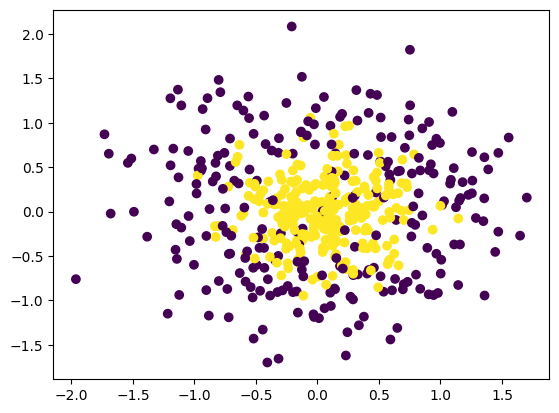

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)

In [6]:
## Procedures:- 

# So, first we apply here D.T and then,give it a task to classify b/w these 2 labels.
# And, also it has to create the 'Decision Boundary' for this.
# After that, we do the same tasks using the help of 'Random Forest'.

In [7]:
# go for decision tree 

from sklearn.tree import DecisionTreeClassifier

In [8]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


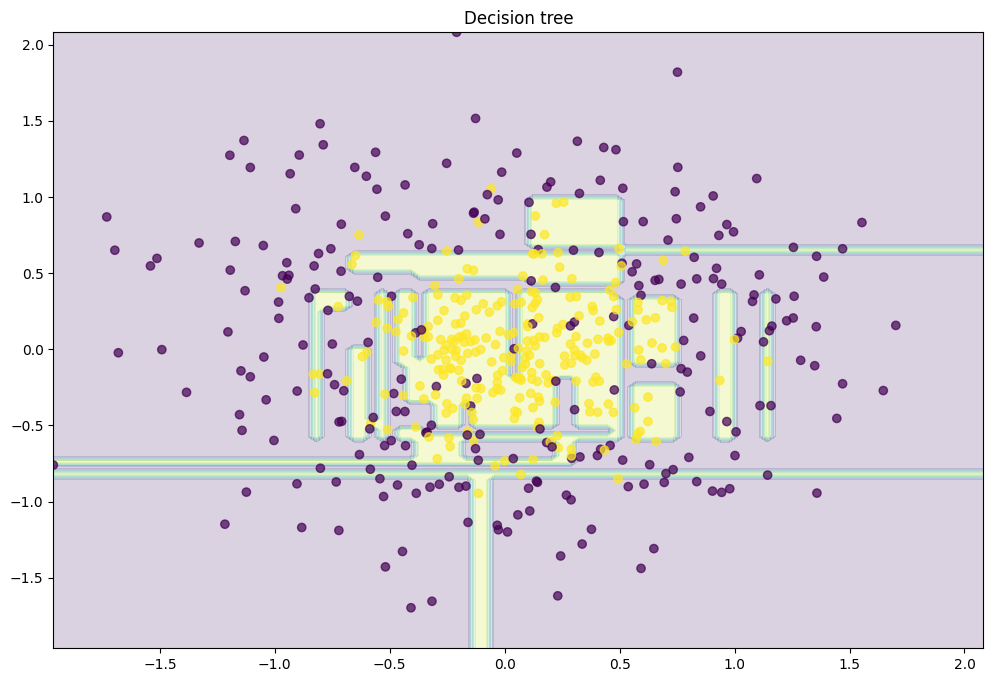

In [9]:
# plot the graph

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

In [10]:
# So, It's a 'fully grown D.T' and isko dekhte hi hme smjh aayega ki ye algo. 'LB-HV'(low bias-high variance) hai.
# it indirectly means that here is 'over-fitting' (Also in graph,it seems that it tries to learn all the 'training_points'). 

<h3> Apply Random Forest </h3>

In [11]:
# So, Apply the 'Random_Forest' for the same problem.

from sklearn.ensemble import RandomForestClassifier

In [12]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train,y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


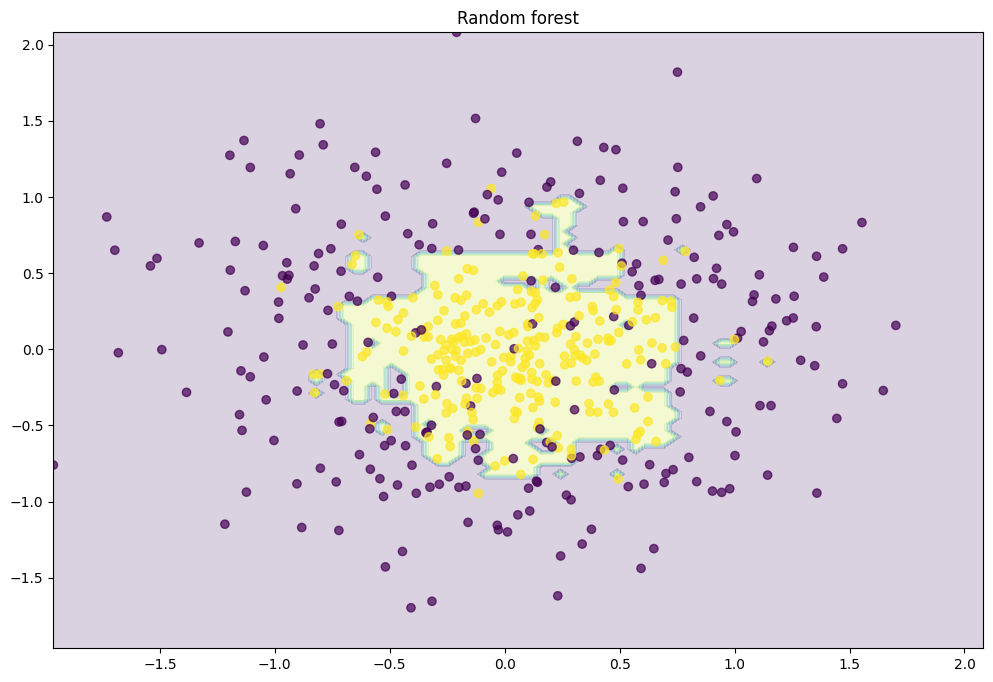

In [13]:
# plot the graph

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

In [14]:
# So,we can say that it is 'LB-LV' (actually a litlle 'bias' increases here on 'training_data', but our 'variance' decreases).
# may be it gives an error for 'trainig_point' on some places but it performs better for 'testing_point'.

In [15]:
# So, that's why 'RANDOM FOREST' is such an important algo. b/c it converts 'LB-HV' into 'LB-LV'.

In [16]:
# Now, let's apply same example on "Regression" 
# Let's take this data for this:-

In [17]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

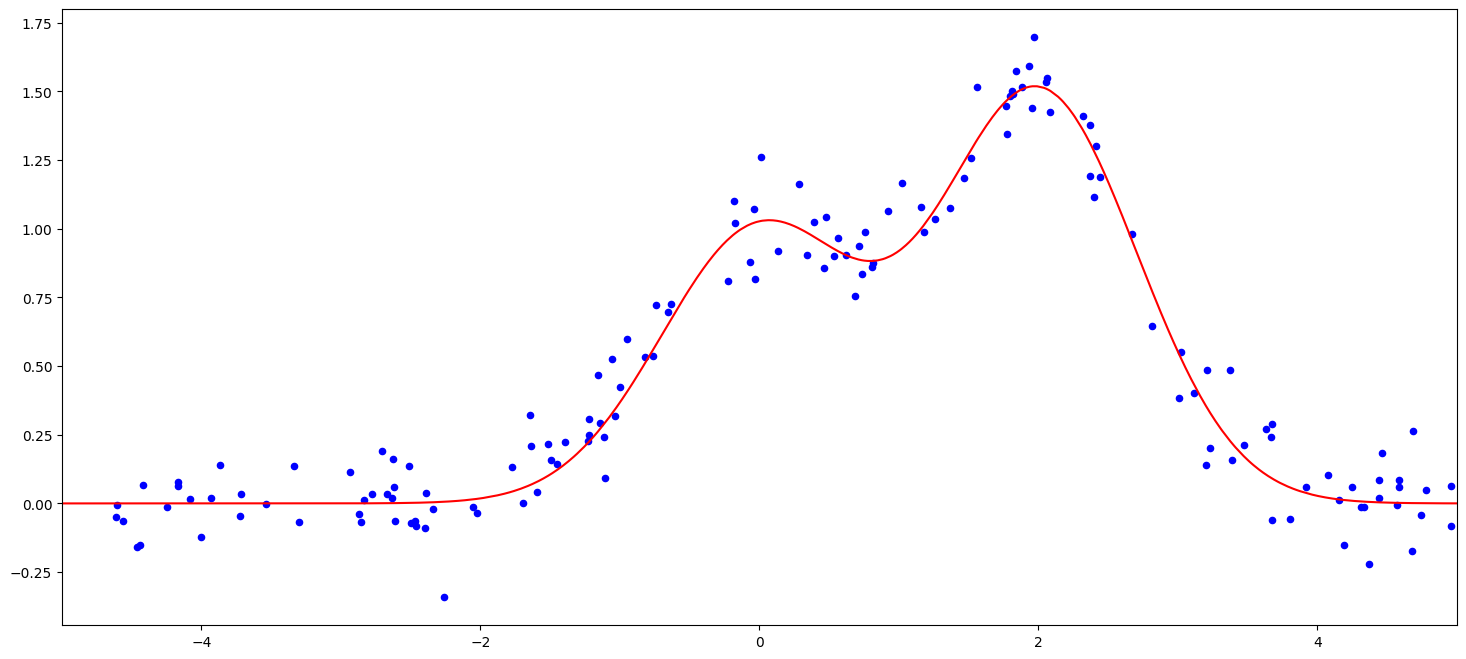

In [18]:
# plot the graph for this -

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])     

In [19]:
# It's a 'Regression problem' having (1 i/p + 1 o/p column)
# And, this 'Red_line_curve' shows the true pattern(nature) of this data.    

In [20]:
# Now, we have to apply 'regressor' on this.
# So, first we have to apply for DecisionTreeClassifier' and then, we apply 'Random ForestRegressor'.

<h3> Decision Tree Regressor </h3>

In [21]:
# One decision tree regressor

from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train,y_train)
d_predict = dtree.predict(X_test)

Text(0.5, 1.0, 'Decision tree, MSE = 22.70')

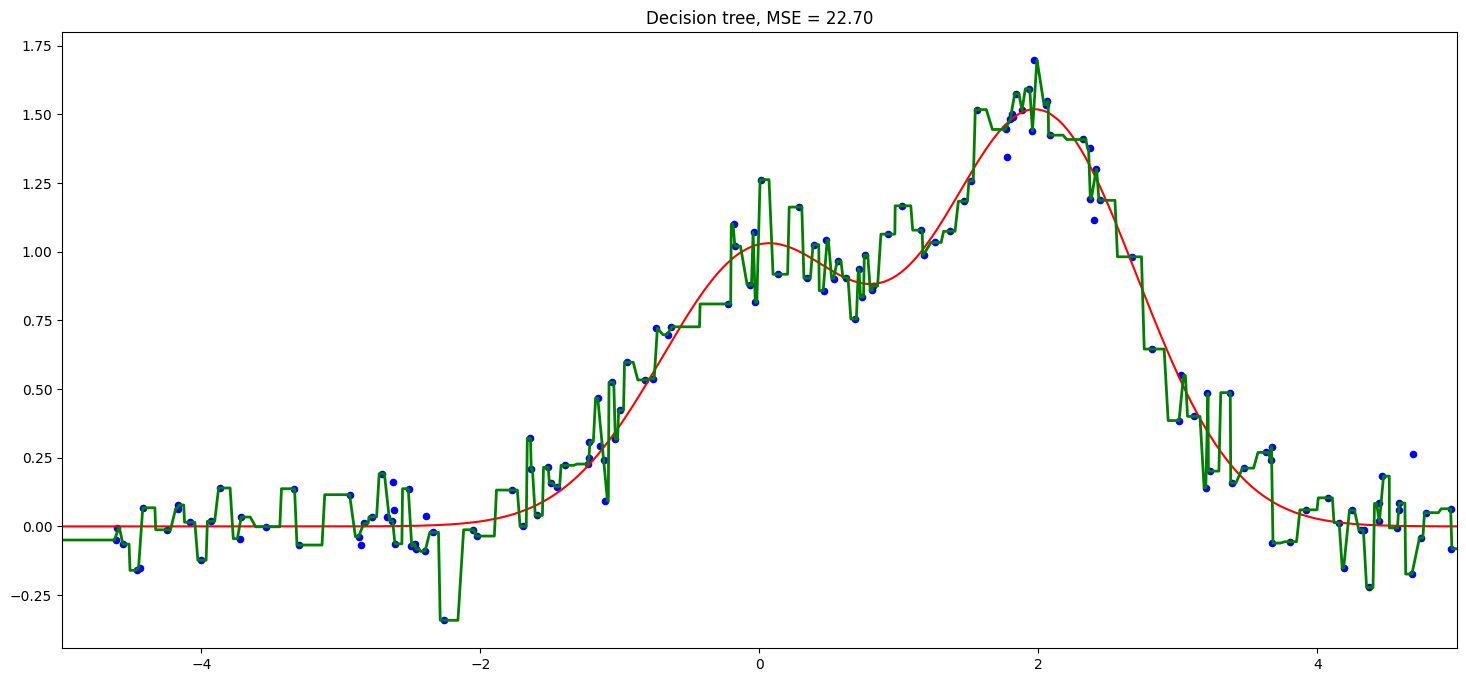

In [22]:
# plot he graph for this 

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

In [23]:
# here 'Green_line_curve' indicates the 'Decision_regressor' and it tries to find the best nature of the data,but it fails.

In [24]:
# so,maybe it gives the correct result for the 'training_data', but it fails on the 'testing_data'.
# As here bias is very low and variance is very high (case of 'over-fitting').
# we can also say that training error is 'very low' whereas testing error is 'very high'.

<h3> Random Forest Regressor </h3>

In [25]:
# Random forest regressor 

from sklearn.ensemble import RandomForestRegressor

# here,we train 100 D.T's together.

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train,y_train)
rf_predict = rfr.predict(X_test)

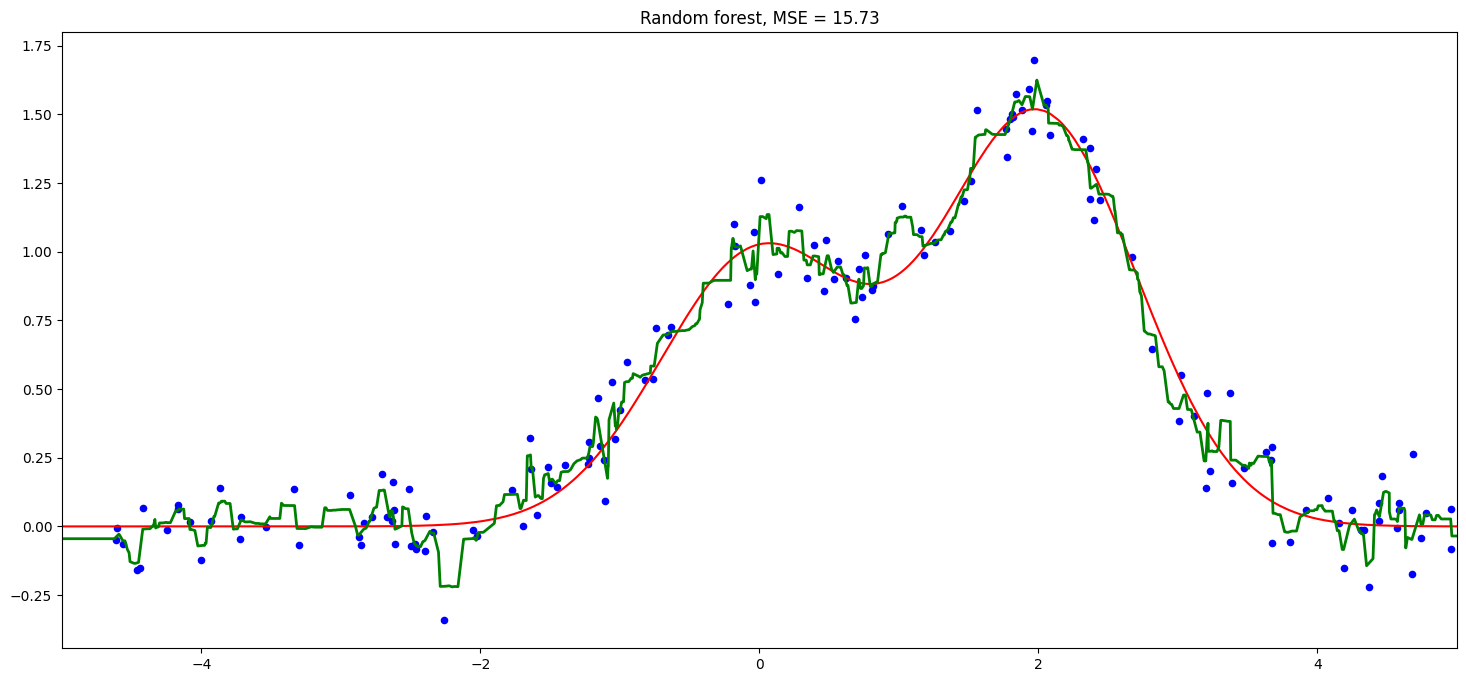

In [26]:
# plot the graph for this 

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

In [27]:
# here, 'Green_line_curve' indicates 'RandomForestRegressor' and it passes through nearer to 'Red_line_curve'. 
# wheras in 'DecisionTreeRegressor',it deviates most from the 'Red_line_curve'.
# which results 'MSE of D.T' is more compared to the 'MSE of R.F' (MSE jitna km, utna accha result).

In [28]:
# Hence,we can say that 'Random Forest' is much better in comparision to 'Decision Trees'. 